In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("stopwords")
from nlp_utils_autism import remove_stopwords, normalize_corpus
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gc

[nltk_data] Downloading package stopwords to /home/cecile/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("data/autism.csv")
df.drop(["created", "url", "Unnamed: 0"], axis = 1, inplace=True)
df.head()

,title,score,id,num_comments,text
0,Let’s talk about ABA therapy. ABA posts outsid...,1436,ub3skp,2254,ABA (Applied Behavior Analysis) therapy is one...
1,Same Food Saturdays !,15,13ga2gz,20,Most of us consistency love consistency. Shar...
2,"Dear *those* autistic men,",345,13h5ymk,123,Our lives aren't automatically better then you...
3,You only accept it as long as it doesn’t incon...,1085,13gyesp,48,NaN
4,Yeah basically.,434,13gxkud,8,NaN


In [3]:
df2 = pd.read_csv("data/autism-2.csv")
df2.drop(["created", "url", "Unnamed: 0"], axis = 1, inplace=True)
df2.head()

,title,score,id,num_comments,text
0,Let’s talk about ABA therapy. ABA posts outsid...,1442,ub3skp,2258,ABA (Applied Behavior Analysis) therapy is one...
1,Media Monday! Let's talk,2,13i0iq5,3,\n\nThis post is for any user who wants to sh...
2,Saw this in a YT short and thought you guys wo...,1918,13i0rda,21,NaN
3,I relate.,269,13iayco,18,NaN
4,“Do your best” doesn’t actually mean “do the b...,465,13i23yo,83,“Do your best” doesn’t actually mean “try as h...


In [4]:
frames = [df,df2]
new_df = pd.concat(frames)
new_df.head()

,title,score,id,num_comments,text
0,Let’s talk about ABA therapy. ABA posts outsid...,1436,ub3skp,2254,ABA (Applied Behavior Analysis) therapy is one...
1,Same Food Saturdays !,15,13ga2gz,20,Most of us consistency love consistency. Shar...
2,"Dear *those* autistic men,",345,13h5ymk,123,Our lives aren't automatically better then you...
3,You only accept it as long as it doesn’t incon...,1085,13gyesp,48,NaN
4,Yeah basically.,434,13gxkud,8,NaN


In [5]:
new_df.drop_duplicates('id', inplace=True)
new_df.drop([0, 1], inplace=True)
new_df['id'].count()

1276

In [6]:
df = new_df.copy()

## Cleaning

In [7]:
df.shape

(1276, 5)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(1083, 5)

In [10]:
df["score"] = df["score"].astype("int32")
df["num_comments"] = df["num_comments"].astype("int32")

In [11]:
df_title = df[["title", "score",
               "num_comments"]]
df_title.head()

,title,score,num_comments
2,"Dear *those* autistic men,",345,123
8,I am a server. I waited on someone with autism...,34,5
9,"The Love of my life, while on the spectrum…",49,2
11,DJing has been a great way for me to share one...,40,6
12,It makes me extremely angry that we don’t have...,219,47


In [12]:
df_title.describe()

,score,num_comments
count,1083.000000,1083.000000
mean,26.724838,10.132041
std,124.749472,26.238352
min,0.000000,0.000000
25%,1.000000,2.000000
50%,3.000000,4.000000
75%,6.000000,8.000000
max,1933.000000,293.000000


## Data Analysis

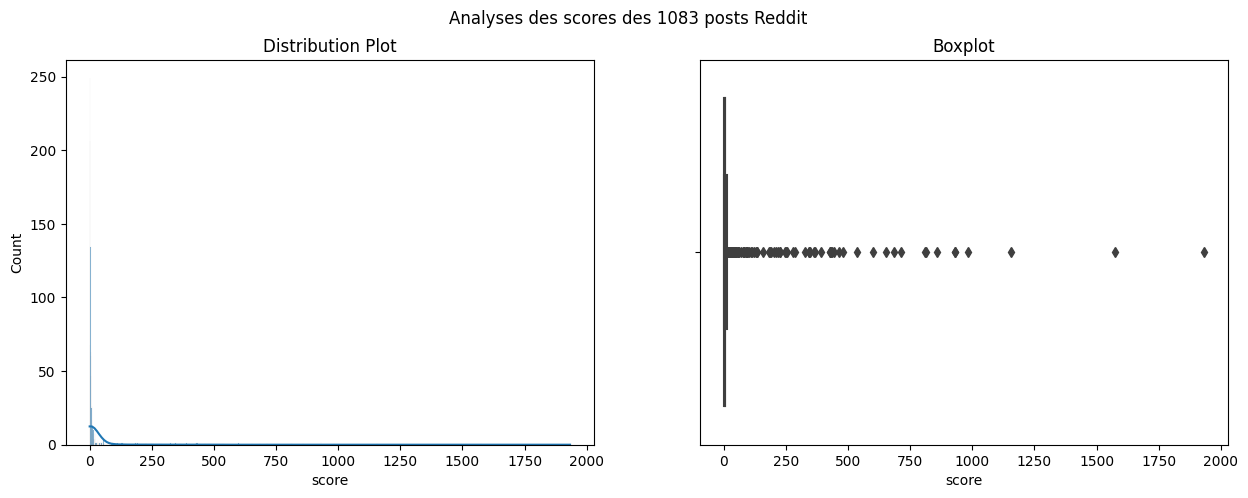

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Analyses des scores des 1083 posts Reddit')

sns.histplot(ax=axes[0], x="score", data=df_title, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="score", data=df_title)
axes[1].set_title("Boxplot")

plt.show()

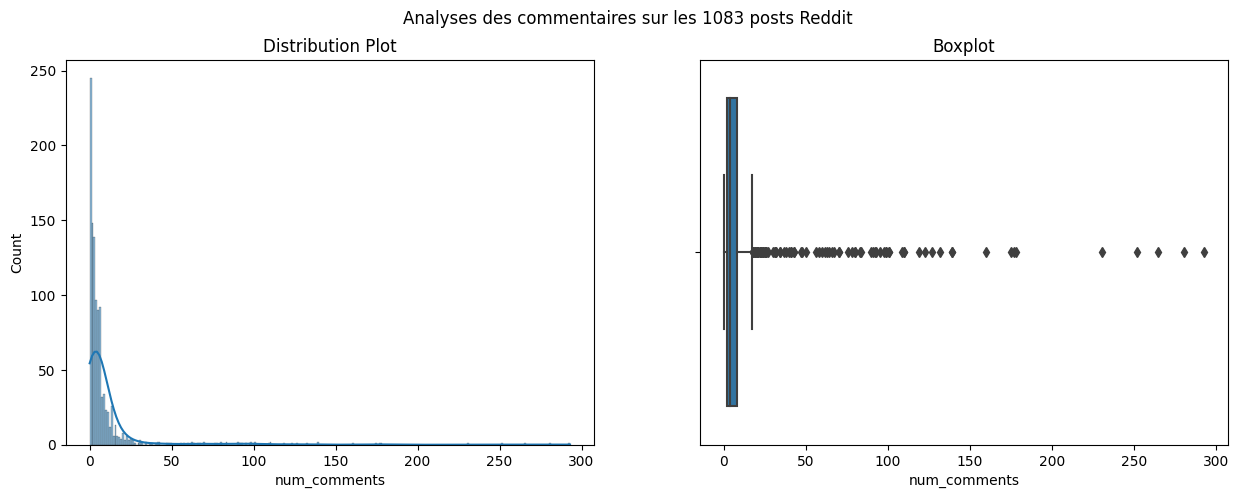

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Analyses des commentaires sur les 1083 posts Reddit')

sns.histplot(ax=axes[0], x="num_comments", data=df_title, kde=True)
axes[0].set_title("Distribution Plot")

sns.boxplot(ax=axes[1], x="num_comments", data=df_title)
axes[1].set_title("Boxplot")

plt.show()

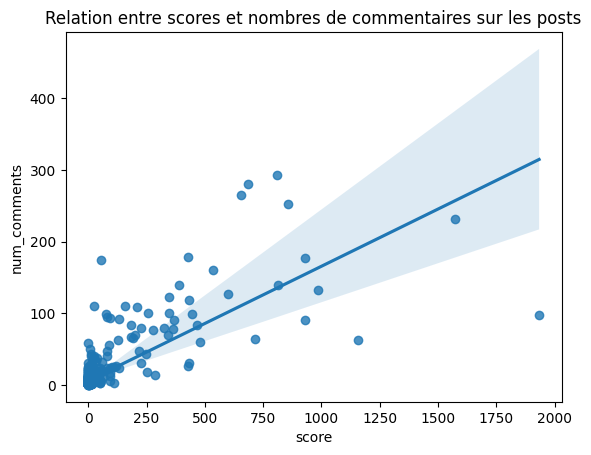

In [15]:
sns.regplot(x="score",
            y="num_comments",
            data=df)
plt.title("Relation entre scores et nombres de commentaires sur les posts")
plt.show()

## Title Analysis

In [16]:
df_title["title"] = normalize_corpus(df_title["title"])

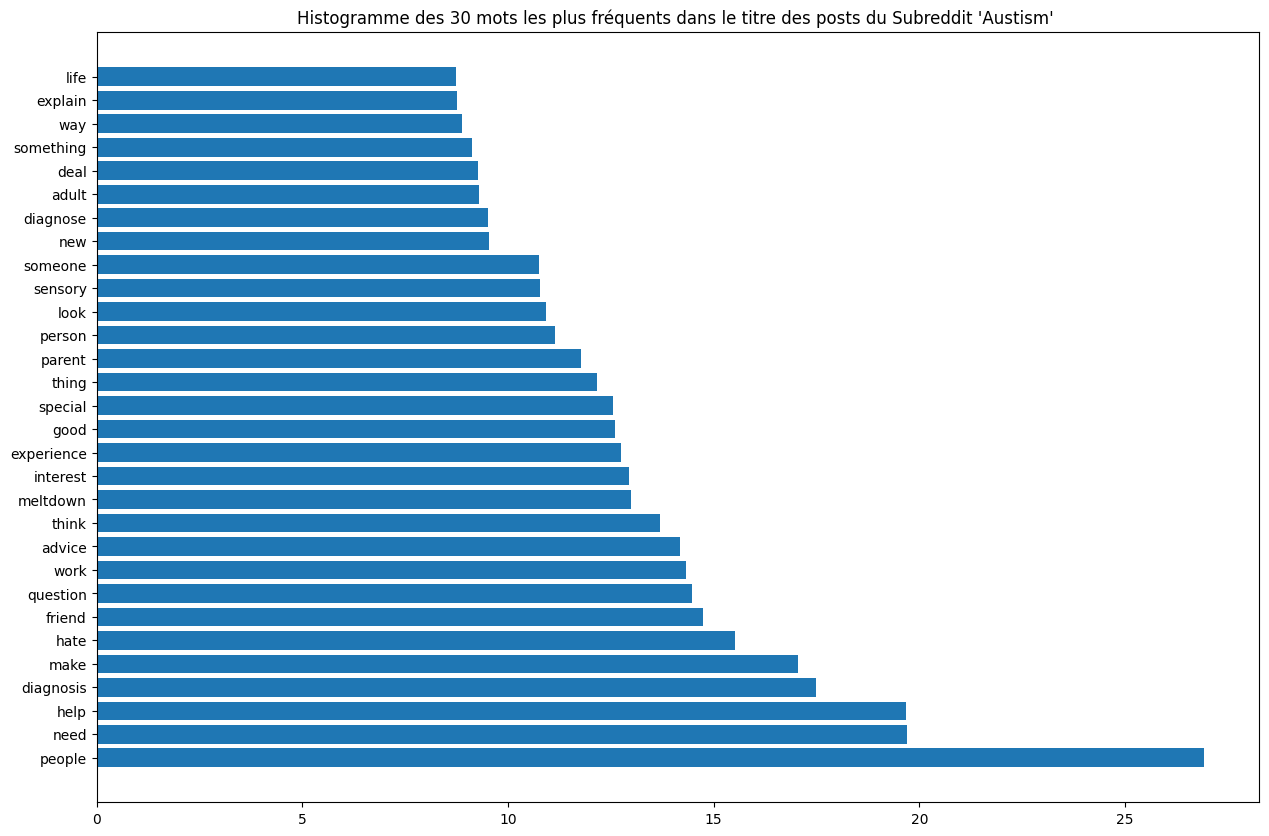

In [17]:
vectorizer_tf = TfidfVectorizer(max_features=500)
tfidf_title = vectorizer_tf.fit_transform(df_title['title']).toarray()
feature_names = vectorizer_tf.get_feature_names_out()
df_title_tf = pd.DataFrame(tfidf_title, columns=feature_names)
df_title_tf = pd.DataFrame(df_title_tf.sum(), columns=["Value"])
top_20_title_word_tf = df_title_tf.sort_values("Value",ascending=False)[:30]

plt.figure(figsize=(15,10))
plt.barh(y=top_20_title_word_tf.index, width=top_20_title_word_tf.Value)
plt.title("Histogramme des 30 mots les plus fréquents dans le titre des posts du Subreddit 'Austism' ")
plt.show()

In [18]:
df_title.to_csv("data/autism-title.csv")

In [19]:
del(df_title)
gc.collect()

11191

## Content Analysis

In [20]:
df_text = df[["text", "score", 
              "num_comments"]]

In [21]:
df_text["text"] = normalize_corpus(df_text["text"])

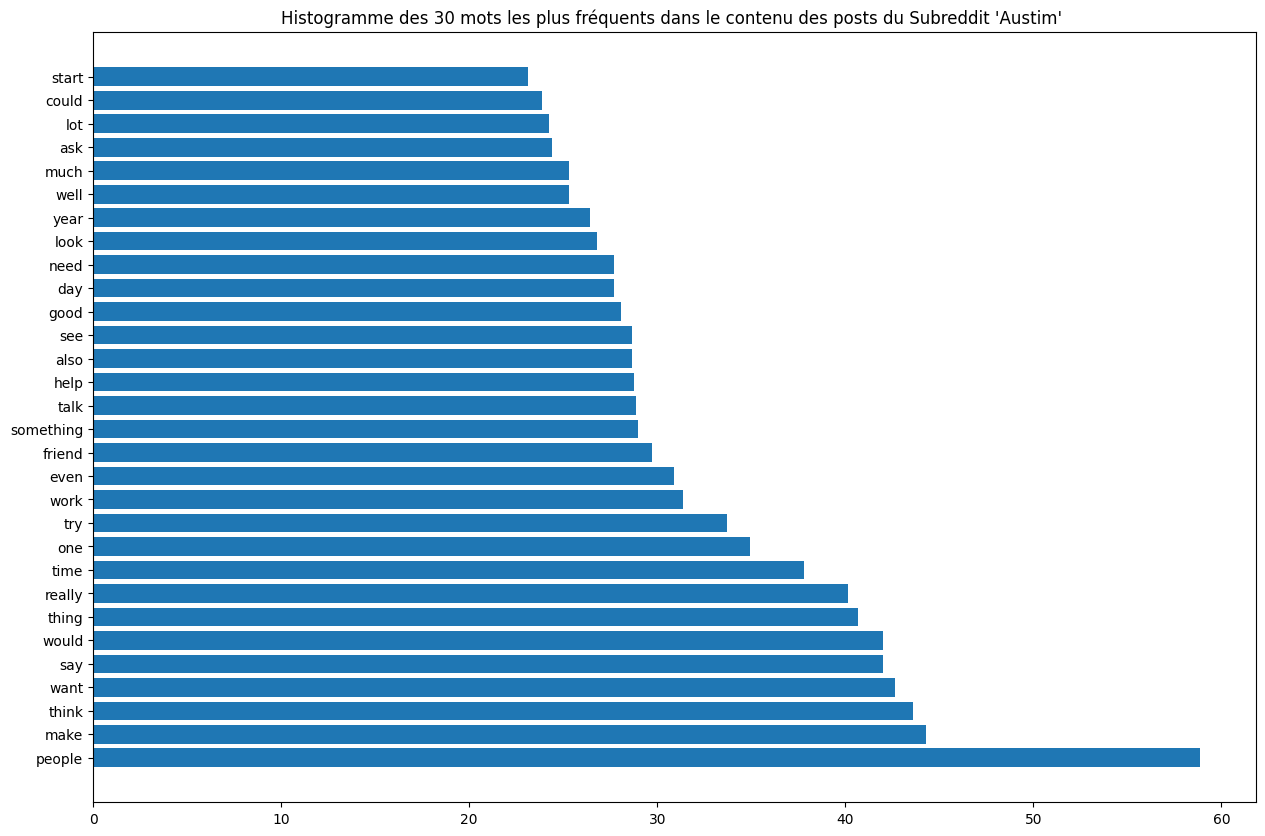

In [22]:
vectorizer_tf = TfidfVectorizer(max_features=500)
tfidf_title = vectorizer_tf.fit_transform(df_text['text']).toarray()
feature_names = vectorizer_tf.get_feature_names_out()
df_title_tf = pd.DataFrame(tfidf_title, columns=feature_names)
df_title_tf = pd.DataFrame(df_title_tf.sum(), columns=["Value"])
top_20_title_word_tf = df_title_tf.sort_values("Value",ascending=False)[:30]

plt.figure(figsize=(15,10))
plt.barh(y=top_20_title_word_tf.index, width=top_20_title_word_tf.Value)
plt.title("Histogramme des 30 mots les plus fréquents dans le contenu des posts du Subreddit 'Austim' ")
plt.show()

In [23]:
df_text.to_csv("data/autism-text.csv")